# Drills

1.Load the data using the existing **diabetes** dataset from scikit-learn.

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

In [37]:
diabetes = load_diabetes()

In [38]:
x = diabetes.data
y = diabetes.target

In [39]:
x.shape

(442, 10)

In [40]:
type(diabetes)

sklearn.utils.Bunch

In [41]:
y.shape

(442,)

2.Explore your data by viewing and calculating some basic statistical details like percentile, mean. (TIP: Use Pandas!)

In [42]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [43]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [44]:
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

In [45]:
df.head(5)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [46]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

3.Create some scatter plots or any other kind of plots that help you understand the data.

<AxesSubplot:>

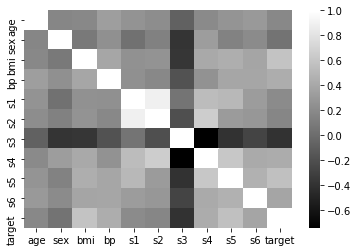

In [47]:
Matcorr = df.corr()
sns.heatmap(Matcorr, cmap= 'gist_gray')

In [48]:
y = df['target']
x = df.drop('target', axis=1)

In [49]:
print('x shape : ', x.shape)
print('y shape : ', y.shape)

x shape :  (442, 10)
y shape :  (442,)


In [58]:
degree = 1

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
inputs = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree)), ("mode", LinearRegression())]
pipe = Pipeline(inputs)

In [60]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=1)),
                ('mode', LinearRegression())])

In [72]:
#print(X_test)#.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x.shape)
print(y.shape)

(353, 10)
(89, 10)
(353,)
(89,)
(442, 10)
(442,)


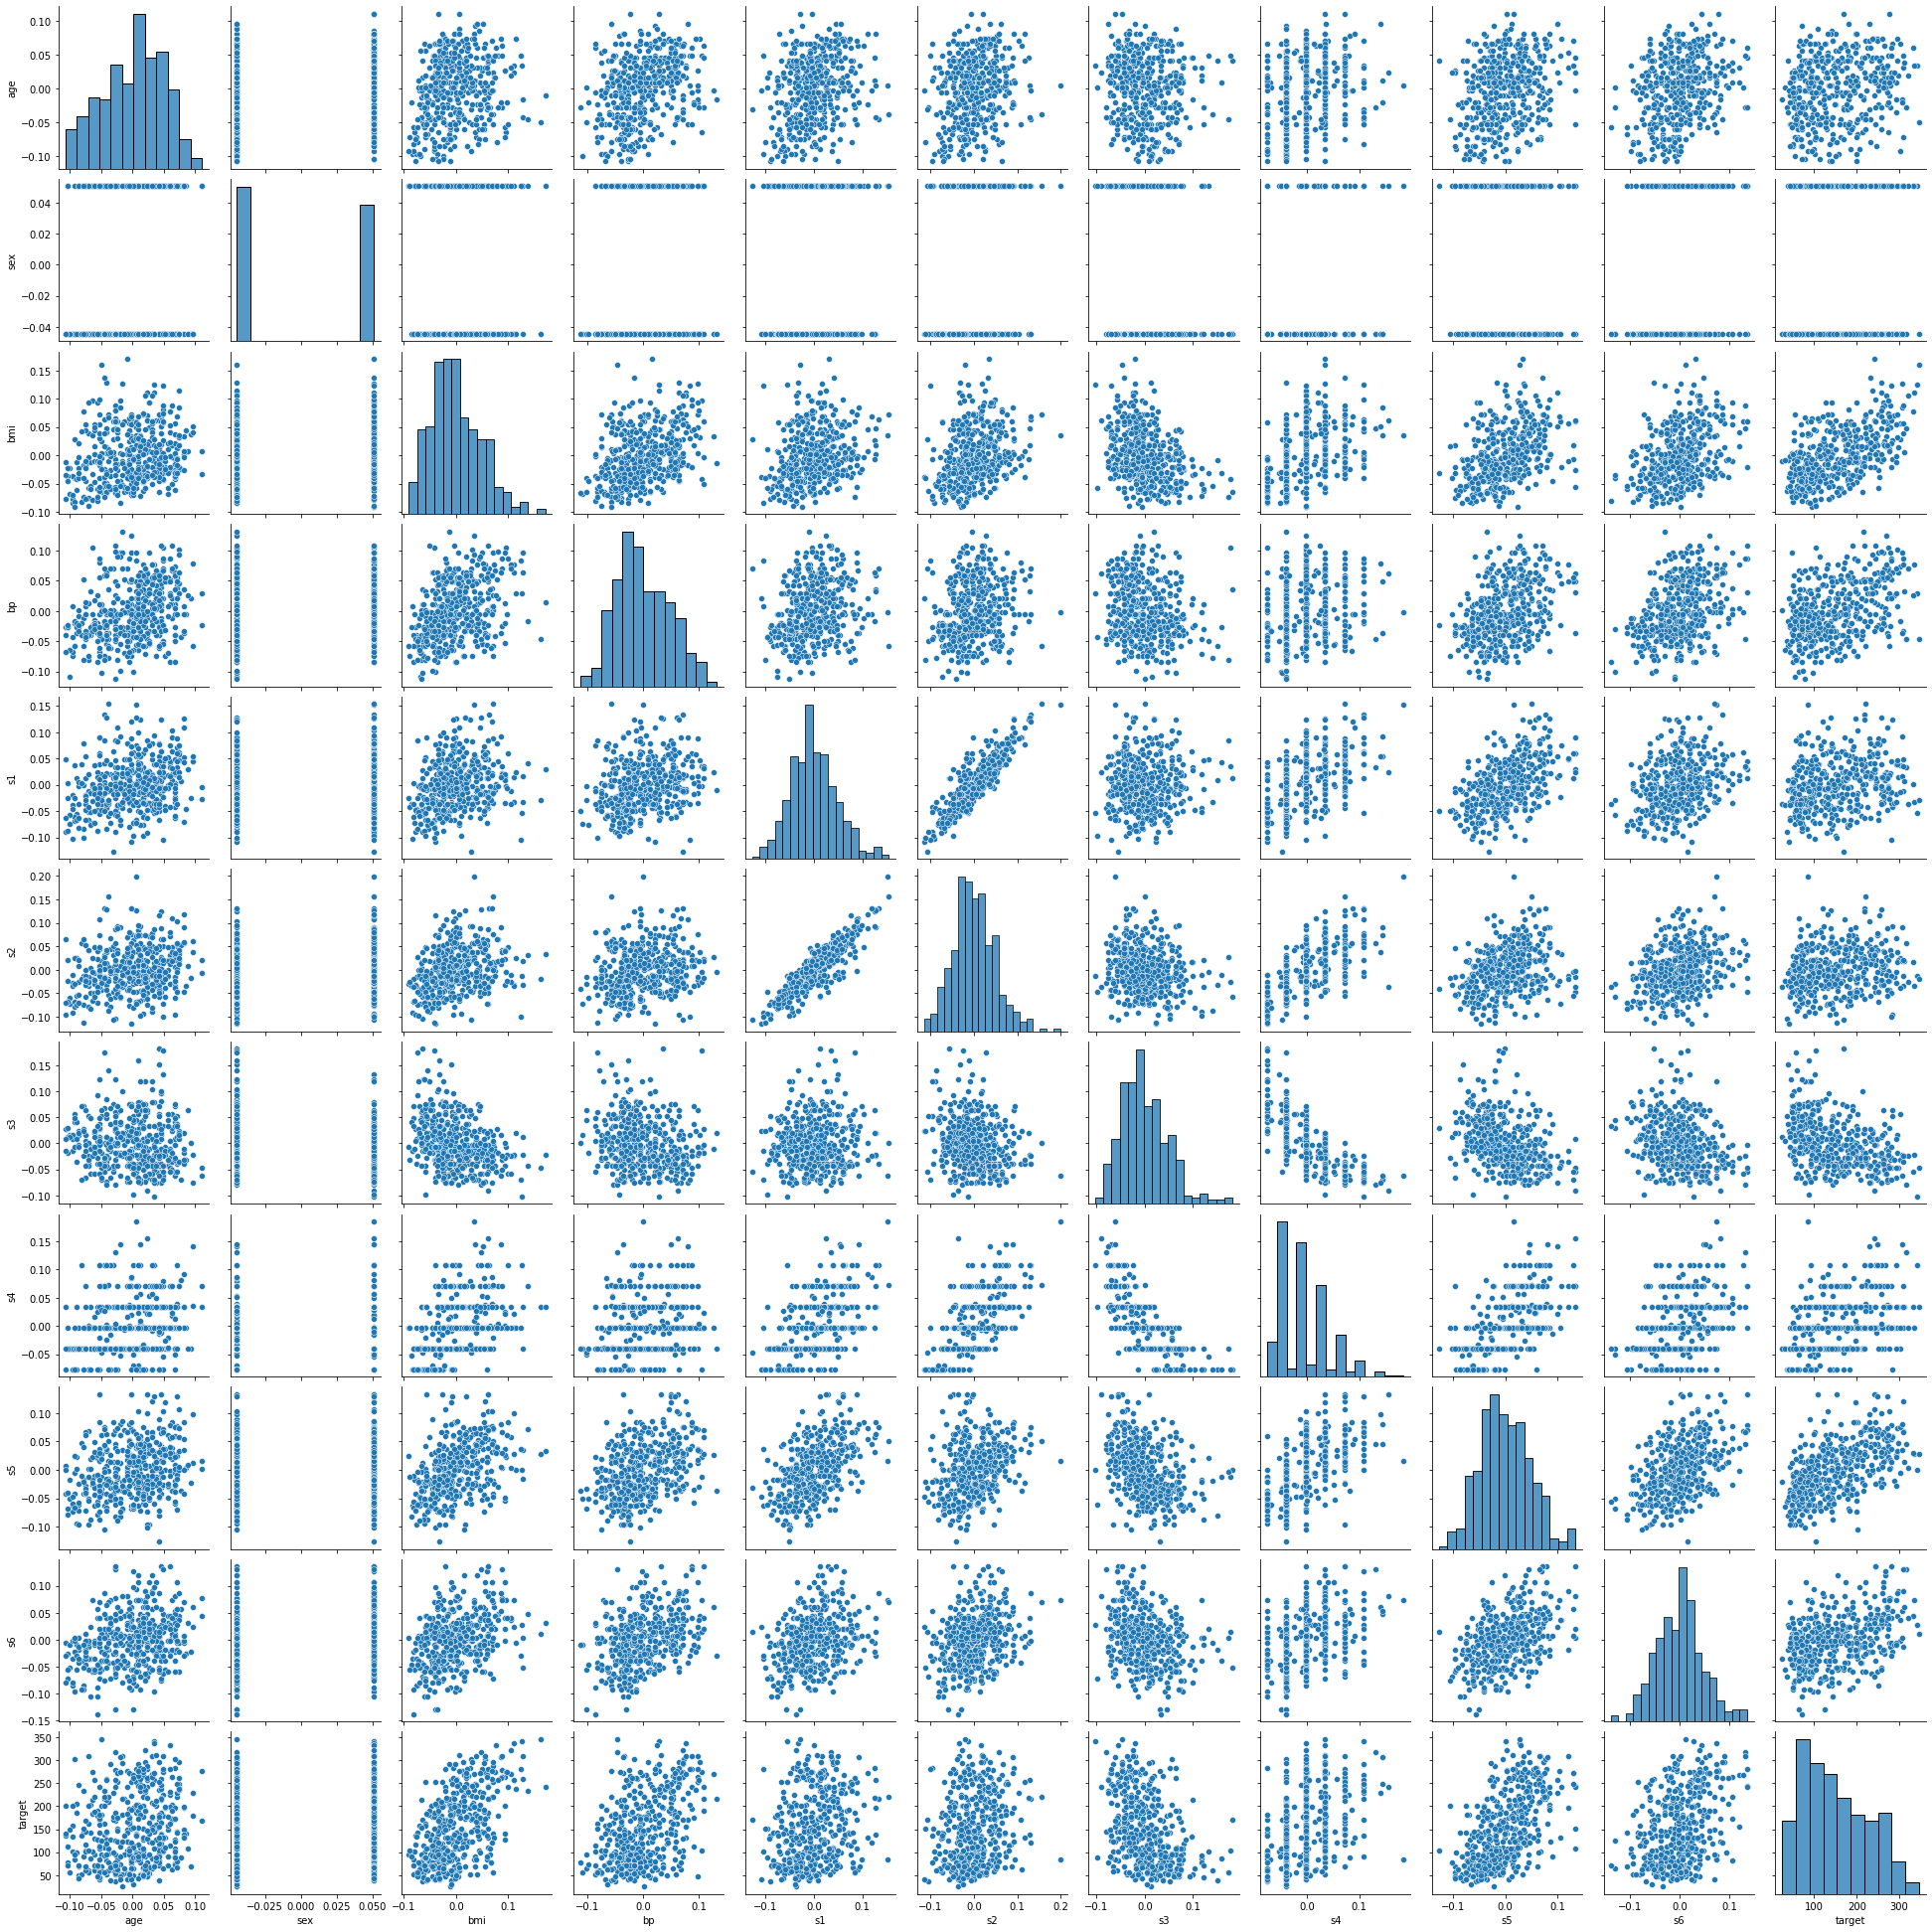

In [70]:
sns.pairplot(df)

In [75]:
fig, ax = plt.subplots(figsize= (12, 10))
_= ax.scatter(X_test, pipe.predict(X_test), c= 'red')
_= ax.scatter(X_test, y)

ValueError: x and y must be the same size

4.Create a model and predict the accuracy. 

In [91]:

model = LinearRegression()

In [114]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5135688800943249

In [115]:
predictions = model.predict(X_test)

5.Play with more datasets, such as **boston** from scikit-learn, or find online datasets, such as [this](https://www.kaggle.com/dmvreddy91/usahousing) or [this](https://www.kaggle.com/hellbuoy/car-price-prediction). (Careful: not all the datasets are appropriate for regression, so make sure to specify that to your query)